# Importing libraries

In [41]:
!pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade tensorflow

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[165.   158.   152.  ]
   [165.   158.   152.  ]
   [166.   159.   153.  ]
   ...
   [164.75 156.75 153.75]
   [164.75 156.75 153.75]
   [167.25 159.25 156.25]]

  [[164.   157.   151.  ]
   [164.75 157.75 151.75]
   [166.25 159.25 153.25]
   ...
   [163.25 155.25 152.25]
   [163.75 155.75 152.75]
   [165.25 157.25 154.25]]

  [[163.25 156.25 150.25]
   [164.5  157.5  151.5 ]
   [166.5  159.5  153.5 ]
   ...
   [163.25 155.25 152.25]
   [167.5  159.5  156.5 ]
   [169.75 161.75 158.75]]

  ...

  [[113.25 102.25  98.25]
   [109.75  98.75  94.75]
   [109.    98.    94.  ]
   ...
   [117.25 107.25 105.25]
   [117.5  107.5  105.5 ]
   [116.25 106.25 104.25]]

  [[106.5   95.5   91.5 ]
   [112.75 101.75  97.75]
   [109.5   98.5   94.5 ]
   ...
   [110.75 100.75  98.75]
   [110.75 100.75  98.75]
   [112.25 102.25 100.25]]

  [[110.5   99.5   95.5 ]
   [111.25 100.25  96.25]
   [113.75 102.75  98.75]
   ...
   [112.5  102.5  100.5 ]
   [110.   100.    98.  ]
   [112.   102.   10

In [8]:
!from tensorflow.keras.layers import Dense,Conv2D
!from tensorflow.keras.models import Sequential

In [9]:
!model= Sequential()

# Building Model

In [10]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [20]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

# Compiling and Training Phase

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [23]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 1464s 666ms/step - loss: 1.3540 - accuracy: 0.6015 - val_loss: 0.6176 - val_accuracy: 0.8097
Epoch 2/10
2197/2197 [==============================] - 1240s 564ms/step - loss: 0.4190 - accuracy: 0.8668 - val_loss: 0.3178 - val_accuracy: 0.8964
Epoch 3/10
2197/2197 [==============================] - 1225s 558ms/step - loss: 0.2543 - accuracy: 0.9186 - val_loss: 0.2139 - val_accuracy: 0.9314
Epoch 4/10
2197/2197 [==============================] - 1272s 579ms/step - loss: 0.1771 - accuracy: 0.9425 - val_loss: 0.1876 - val_accuracy: 0.9402
Epoch 5/10
2197/2197 [==============================] - 1295s 589ms/step - loss: 0.1311 - accuracy: 0.9567 - val_loss: 0.1927 - val_accuracy: 0.9403
Epoch 6/10
2197/2197 [==============================] - 1334s 607ms/step - loss: 0.1019 - accuracy: 0.9674 - val_loss: 0.1095 - val_accuracy: 0.9663
Epoch 7/10
2197/2197 [==============================] - 6416s 3s/step - loss: 0.0835 - accuracy: 0.9725 

# Evaluating Model

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 326s 148ms/step - loss: 0.0143 - accuracy: 0.9955
Training accuracy: 0.9954620003700256


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 82s 149ms/step - loss: 0.0898 - accuracy: 0.9754
Validation accuracy: 0.9754154086112976


# Saving Model

In [26]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
#Return Dictionary of history
training_history.history

{'loss': [1.3539949655532837,
  0.41895708441734314,
  0.25428101420402527,
  0.17706045508384705,
  0.13107915222644806,
  0.10189282149076462,
  0.0835319384932518,
  0.06798545271158218,
  0.06542928516864777,
  0.05278690904378891],
 'accuracy': [0.6014794707298279,
  0.8667899370193481,
  0.9185717105865479,
  0.9425278902053833,
  0.956682562828064,
  0.967437207698822,
  0.9724873900413513,
  0.9777793288230896,
  0.9789743423461914,
  0.9826588034629822],
 'val_loss': [0.6176469326019287,
  0.3177764415740967,
  0.21392811834812164,
  0.18762268126010895,
  0.19265587627887726,
  0.10945671051740646,
  0.12963628768920898,
  0.13025830686092377,
  0.09196032583713531,
  0.08978135138750076],
 'val_accuracy': [0.8096972703933716,
  0.8964261412620544,
  0.9314249753952026,
  0.9401889443397522,
  0.9403027296066284,
  0.9663100242614746,
  0.9585135579109192,
  0.9632938504219055,
  0.9712041616439819,
  0.9754154086112976]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

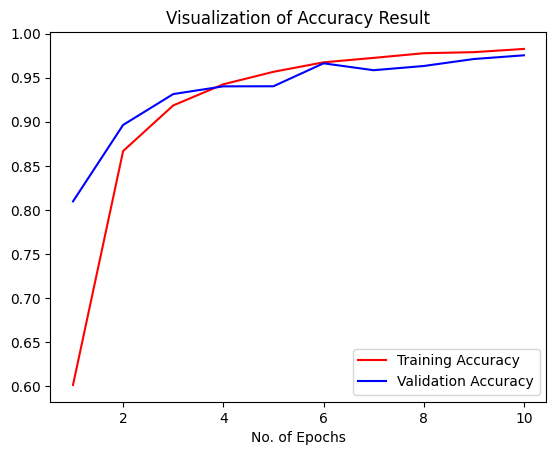

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 261s 15ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.97       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.98      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.96      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.

# Confusion Matrix Visualization

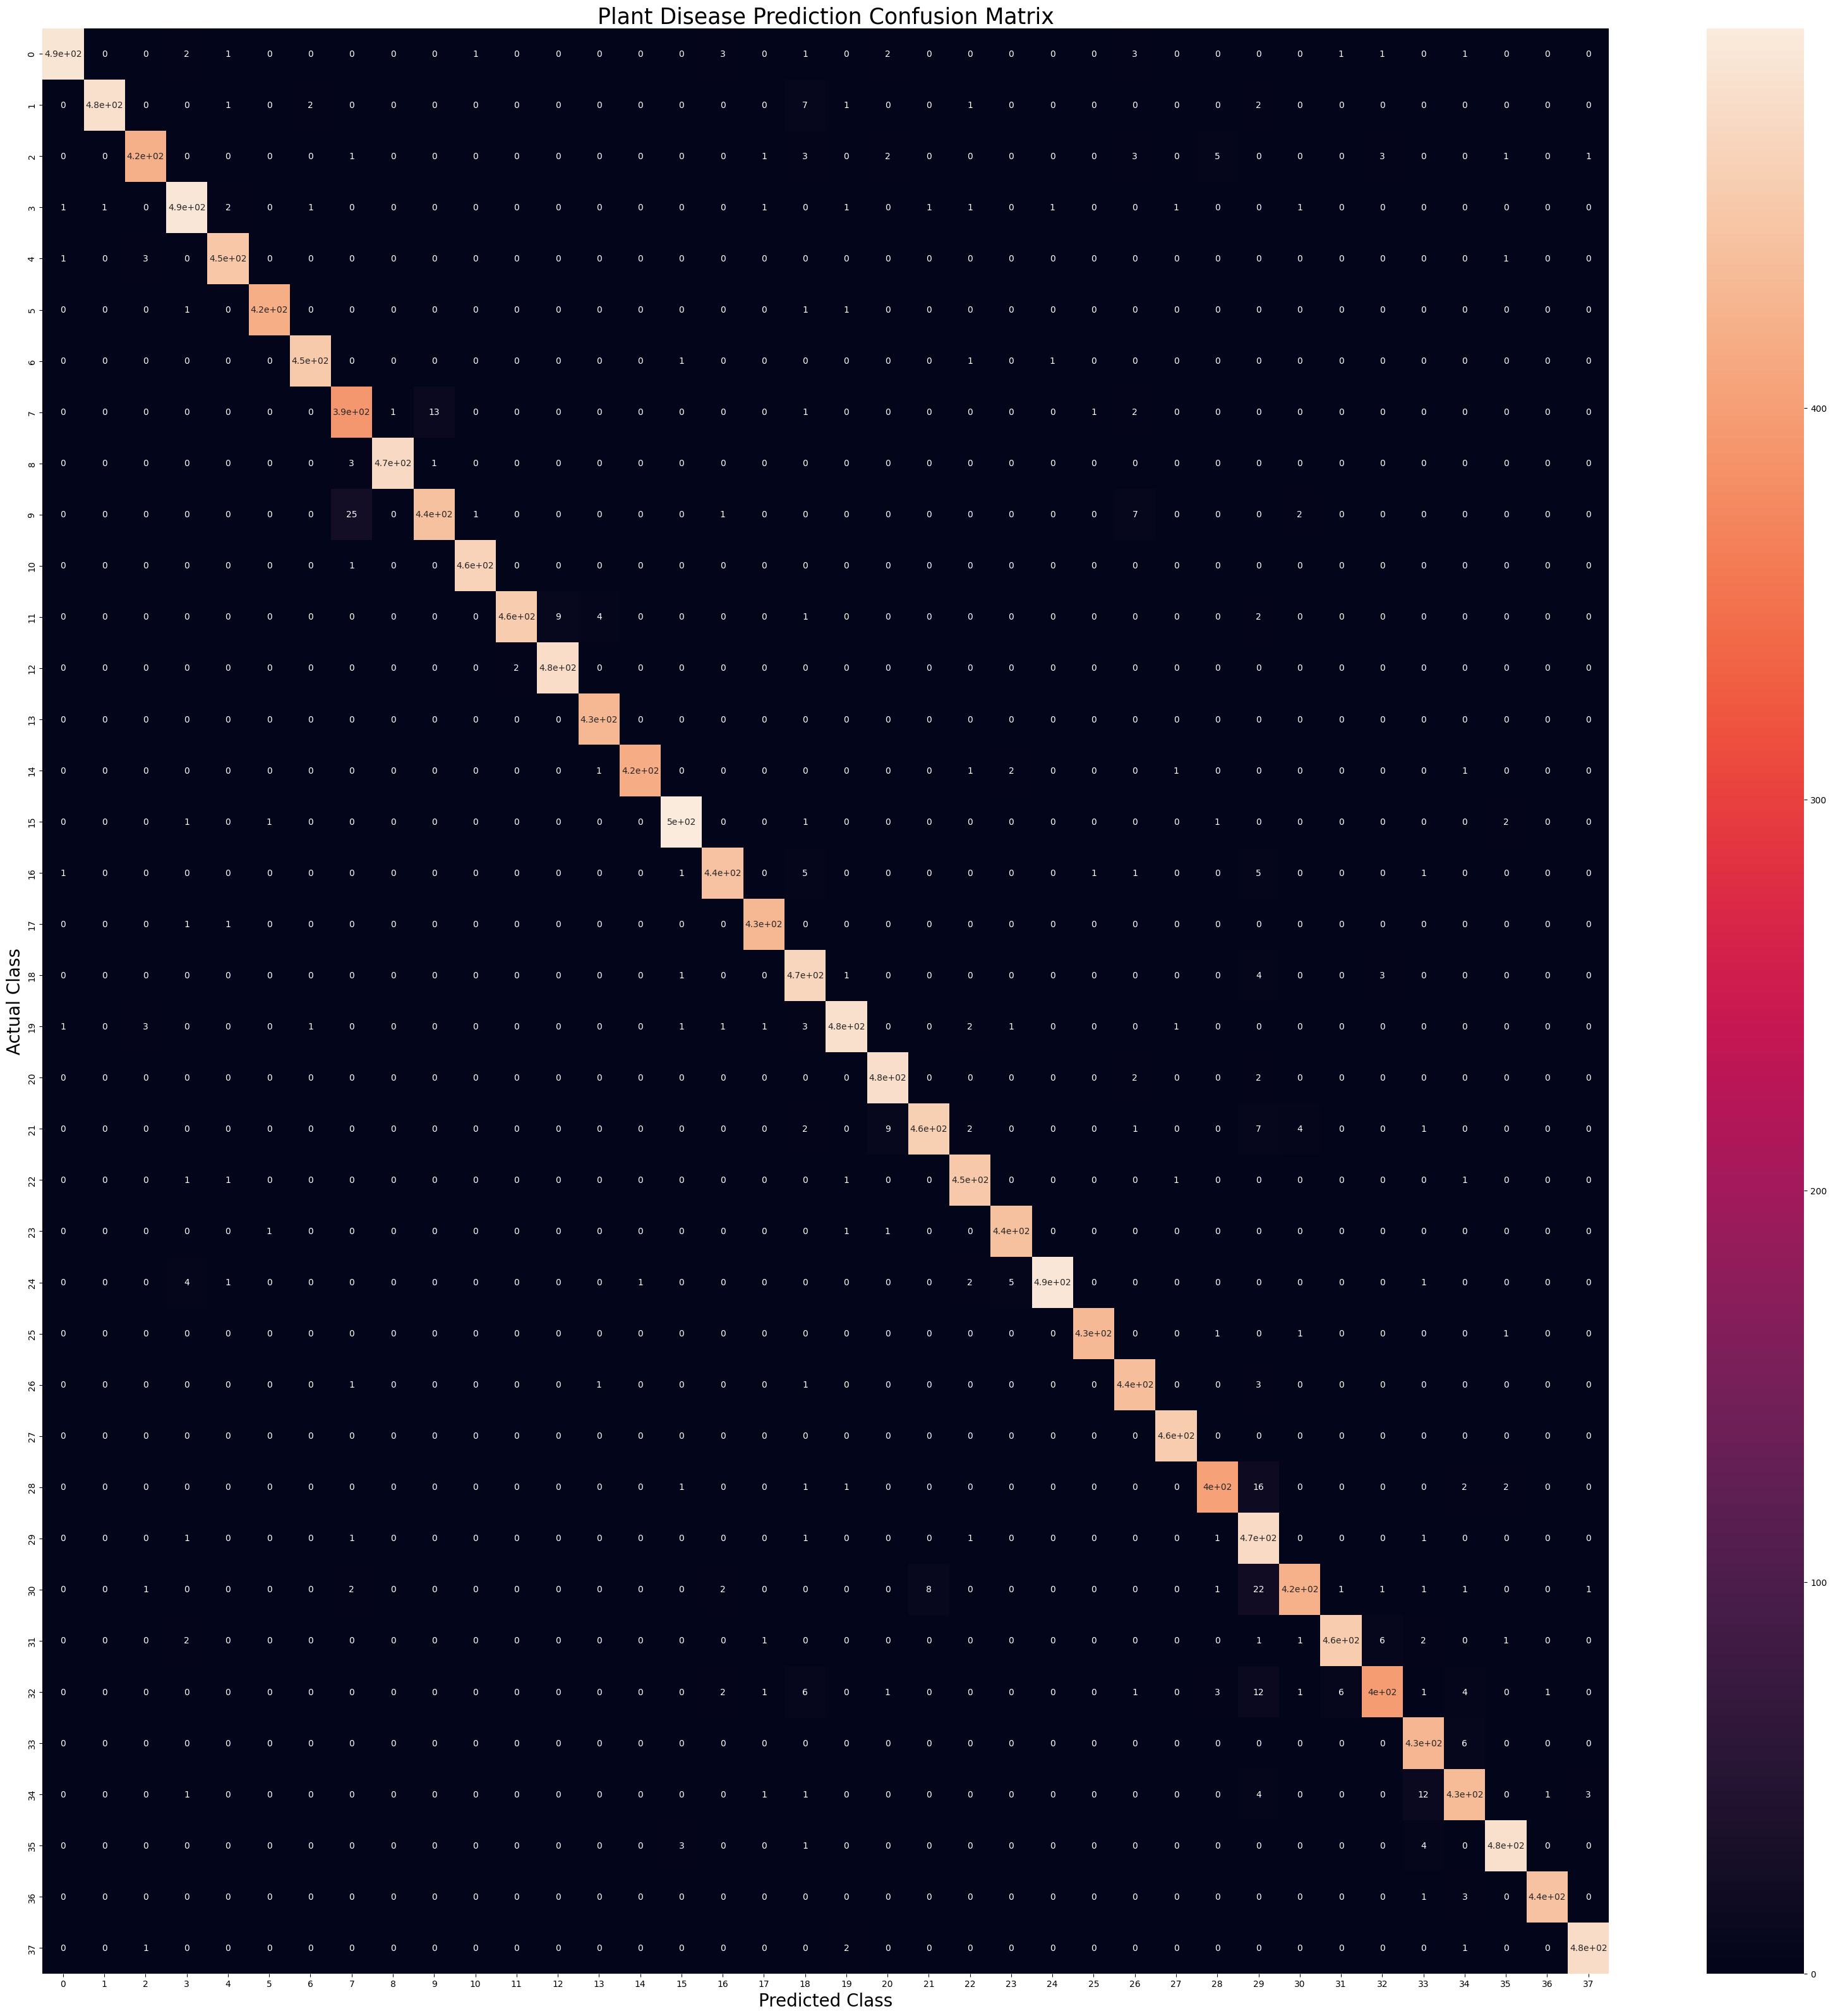

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()